In [2]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series,DataFrame
import pandas as pd

# 可視化モジュール
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 小数第３まで表示
%precision 3

'%.3f'

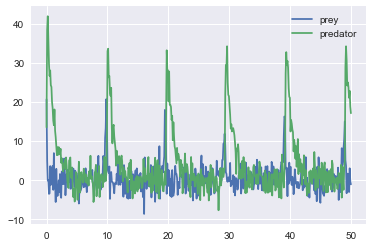

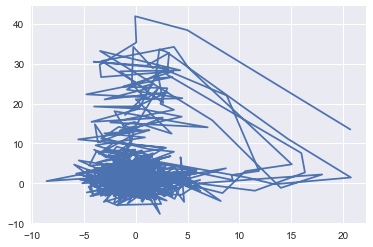

In [3]:
#ロトカ・ヴォルテラ
# dx/dt = ax-xy
# dy/dt = bxy-y

#a,b:定数
#v:変数格納のリスト(x,y)
#ndiv: 分割数
#nlevel: ノイズレベル

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import csv

def func(v, t, a, b):
    return [a*v[0]-v[0]*v[1], b*v[0]*v[1]-v[1]]

a = 4
b = 1.5
ndiv = 500
nlevel = 2.5
v0 = [20, 10]  #初期条件(x0,y0)
t = np.linspace(0, 50., ndiv)  #時間レンジ、間隔

sol_v = odeint(func, v0, t, args=(a, b)) + np.random.normal(0.0,nlevel,(ndiv,2))

plt.plot(t, sol_v[:,0], label="prey")
plt.plot(t, sol_v[:,1], label="predator")

plt.legend()
plt.show()

csvlist = []
csvlist = np.c_[t,sol_v]

# ファイルオープン
f = open('output.csv', 'w')
writer = csv.writer(f, lineterminator='\n')

# 出力
writer.writerows(csvlist)

# ファイルクローズ
f.close()

plt.plot(csvlist[:,1], csvlist[:,2], label="foo")
plt.show()

In [4]:
#ランダムな初期値(a,b,x0,y0)で微分方程式を解いた解のデータとの距離を計算
#numpy.loadtxtを利用してcsvファイル読み込み

#Lotka-Volterraモデル
# dx/dt = ax-xy
# dy/dt = bxy-y

#a, b: 定数 (ランダム値)
#v0: 初期値(x0, y0) (ランダム値)
#sol_v: ランダムな初期値から求めた解
#ans_v: 読み込んだデータ
#dist: データとの距離(差分の平方和)

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import csv

def func(v, t, a, b):
    return [a*v[0]-v[0]*v[1], b*v[0]*v[1]-v[1]]

def getpara(a,b,v0):
    #ランダム値を4個生成(生成されたランダム値の範囲は0〜1)
    #ここでは 0 <= a,b,x0,yo >= 100  とする
    np.random.seed()
    iniv = np.random.rand(4)
    a = iniv[0] * 100
    b = iniv[1] * 100
    x0 = iniv[2] * 100
    y0 = iniv[3] * 100
    v0 = [x0, y0]
    return a,b,v0

ndiv = 500 #分割数
t = np.linspace(0, 50., ndiv) #時間レンジ、間隔

#CSVファイルの読み込み
data_reader = np.loadtxt('output.csv', delimiter=',')
ans_v = data_reader[:,1:3]

counter = 0
ntry = 0
tolerance = 10000.0
param = []
v0 = []
while counter < 100:
    ntry += 1
    a,b,v0 = getpara(a,b,v0)
#    print a,b,v0
    sol_v = odeint(func, v0, t, args=(a, b))
#    plt.plot(t, sol_v[:,0], label="prey")
#    plt.plot(t, sol_v[:,1], label="predator")

#   plt.legend()
#   plt.show()
    
#ランダムな初期値から求めた解とデータとの平均距離distを計算  
    #答えと計算結果の行列の差
    diff_v = sol_v - ans_v
    #行列要素の二乗を計算してから、その平均を計算 
    dist = np.mean(np.square(diff_v))
    if dist < tolerance: 
        # 行列paramに追加
        param.append([a,b,v0[0],v0[1],dist])
        counter +=1
    
print(ntry, counter)
with open('param.csv','w') as f:
    writer = csv.writer(f)
    writer.writerows(param)

print(param)

/Users/hachino/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:20: RuntimeWarning: overflow encountered in double_scalars
/Users/hachino/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:61: RuntimeWarning: overflow encountered in square
/Users/hachino/anaconda/lib/python3.6/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/hachino/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in double_scalars


696 100
[[82.249940500219068, 6.7338045910330209, 76.848057745542064, 34.807768884274445, 6070.0637278117929], [69.520765578721694, 16.750026168211964, 4.1383749006288495, 20.618215101904692, 2692.8053465177472], [96.320318009809895, 22.105141504227721, 11.247128558218812, 53.517255286911414, 5724.0544825494244], [40.607396963933375, 15.26465484077737, 33.807617213424102, 66.858640143215439, 2698.6895523270587], [13.072707099357162, 66.262926534237948, 14.60175146750472, 63.836157307989758, 4858.4590476769426], [57.761155292887324, 6.5329910820884018, 47.654953915657593, 9.550251270000965, 2941.9942205873663], [90.311535518929801, 5.9133959077264597, 0.99216801064052618, 55.871344121157485, 4152.4731995353341], [61.331256237519952, 78.151116279828017, 14.10377310885147, 97.023735213574511, 9650.4812894851675], [73.502987611366777, 40.375763150803358, 4.9833333172720646, 40.564187401813697, 3342.8651162364936], [44.755304293764674, 8.7480573634627685, 57.569934418153466, 42.379071672429

In [14]:
arr = np.array(param)

In [15]:
arr

array([[  8.225e+01,   6.734e+00,   7.685e+01,   3.481e+01,   6.070e+03],
       [  6.952e+01,   1.675e+01,   4.138e+00,   2.062e+01,   2.693e+03],
       [  9.632e+01,   2.211e+01,   1.125e+01,   5.352e+01,   5.724e+03],
       [  4.061e+01,   1.526e+01,   3.381e+01,   6.686e+01,   2.699e+03],
       [  1.307e+01,   6.626e+01,   1.460e+01,   6.384e+01,   4.858e+03],
       [  5.776e+01,   6.533e+00,   4.765e+01,   9.550e+00,   2.942e+03],
       [  9.031e+01,   5.913e+00,   9.922e-01,   5.587e+01,   4.152e+03],
       [  6.133e+01,   7.815e+01,   1.410e+01,   9.702e+01,   9.650e+03],
       [  7.350e+01,   4.038e+01,   4.983e+00,   4.056e+01,   3.343e+03],
       [  4.476e+01,   8.748e+00,   5.757e+01,   4.238e+01,   2.842e+03],
       [  2.697e+01,   2.078e+01,   6.083e+01,   1.181e+00,   9.466e+03],
       [  4.957e+01,   1.052e+01,   1.077e+01,   1.926e+01,   1.545e+03],
       [  6.323e+01,   1.876e+00,   8.700e+00,   3.328e+01,   2.191e+03],
       [  7.598e+01,   8.875e-01,   2.

In [20]:
arr[:, 0:2]

array([[ 82.25 ,   6.734],
       [ 69.521,  16.75 ],
       [ 96.32 ,  22.105],
       [ 40.607,  15.265],
       [ 13.073,  66.263],
       [ 57.761,   6.533],
       [ 90.312,   5.913],
       [ 61.331,  78.151],
       [ 73.503,  40.376],
       [ 44.755,   8.748],
       [ 26.968,  20.778],
       [ 49.575,  10.523],
       [ 63.235,   1.876],
       [ 75.977,   0.888],
       [ 57.409,  12.617],
       [  5.843,  13.059],
       [ 58.389,   6.145],
       [ 61.201,   1.773],
       [ 43.074,  35.143],
       [ 48.295,  46.174],
       [ 39.785,   5.207],
       [ 57.446,   2.213],
       [ 71.787,  16.165],
       [ 53.312,  88.787],
       [ 74.532,  15.609],
       [ 11.994,  37.702],
       [ 26.876,   2.598],
       [ 84.387,  16.147],
       [ 57.301,  19.613],
       [ 48.339,  13.57 ],
       [ 89.845,  17.046],
       [ 47.872,  10.329],
       [ 26.108,  41.918],
       [ 19.407,  71.726],
       [ 98.981,   3.025],
       [ 69.71 ,   1.184],
       [ 18.193,  30.853],
 

In [21]:
from operator import itemgetter

In [23]:
param1 = sorted(param, key=itemgetter(4))

In [26]:
param1

[[7.990, 0.209, 51.755, 12.704, 151.281],
 [16.916, 22.563, 4.408, 19.481, 267.889],
 [19.407, 71.726, 0.983, 96.061, 346.938],
 [26.876, 2.598, 39.856, 16.971, 543.119],
 [9.900, 72.688, 3.800, 71.935, 586.648],
 [35.430, 98.837, 0.862, 35.287, 763.164],
 [16.096, 60.244, 6.032, 6.197, 896.361],
 [39.785, 5.207, 5.926, 58.073, 935.635],
 [38.073, 5.567, 13.387, 96.949, 943.587],
 [44.542, 0.124, 50.710, 43.717, 1017.880],
 [44.548, 47.080, 2.982, 31.368, 1299.847],
 [42.541, 5.546, 33.987, 71.332, 1328.457],
 [45.368, 14.284, 12.298, 65.543, 1361.131],
 [48.295, 46.174, 2.974, 28.400, 1502.070],
 [42.377, 11.303, 23.650, 63.370, 1537.049],
 [49.575, 10.523, 10.771, 19.256, 1545.224],
 [11.994, 37.702, 13.665, 66.874, 1566.059],
 [18.066, 19.235, 26.574, 8.466, 1600.528],
 [25.628, 15.053, 30.827, 37.292, 1620.119],
 [46.928, 7.374, 33.605, 44.143, 1660.650],
 [61.201, 1.773, 5.510, 79.855, 1874.049],
 [17.606, 6.136, 89.987, 62.130, 1905.281],
 [16.802, 7.383, 77.754, 5.024, 1907.864]

In [24]:
arr1 = np.array(param1)

In [25]:
arr1[:, 0:2]

array([[  7.99 ,   0.209],
       [ 16.916,  22.563],
       [ 19.407,  71.726],
       [ 26.876,   2.598],
       [  9.9  ,  72.688],
       [ 35.43 ,  98.837],
       [ 16.096,  60.244],
       [ 39.785,   5.207],
       [ 38.073,   5.567],
       [ 44.542,   0.124],
       [ 44.548,  47.08 ],
       [ 42.541,   5.546],
       [ 45.368,  14.284],
       [ 48.295,  46.174],
       [ 42.377,  11.303],
       [ 49.575,  10.523],
       [ 11.994,  37.702],
       [ 18.066,  19.235],
       [ 25.628,  15.053],
       [ 46.928,   7.374],
       [ 61.201,   1.773],
       [ 17.606,   6.136],
       [ 16.802,   7.383],
       [ 57.446,   2.213],
       [ 58.389,   6.145],
       [ 53.033,  60.129],
       [ 63.235,   1.876],
       [ 60.419,   0.222],
       [ 69.521,  16.75 ],
       [ 40.607,  15.265],
       [ 71.117,   0.442],
       [ 48.968,   7.987],
       [ 69.71 ,   1.184],
       [ 44.755,   8.748],
       [ 69.515,   1.968],
       [ 57.761,   6.533],
       [ 63.672,  10.619],
 

/Users/hachino/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


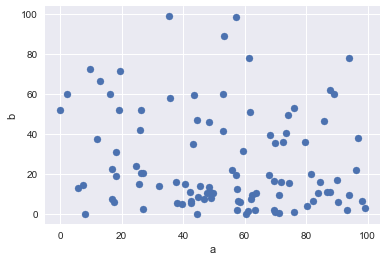

In [48]:
fig = plt.figure()
a = arr1[:, 0]
b = arr1[:, 1]
ax = fig.add_subplot(1,1,1)
ax.scatter(arr1[:, 0],arr1[:, 1])
ax.set_xlabel('a')
ax.set_ylabel('b')
fig.show()

In [50]:
arr1[79,:]

array([   68.085,    39.674,    19.561,    89.314,  6690.272])

/Users/hachino/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:16: RuntimeWarning: overflow encountered in double_scalars


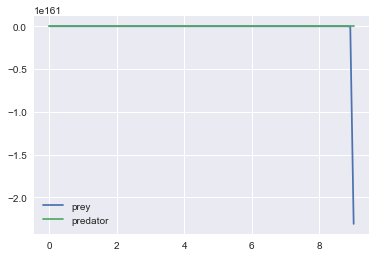

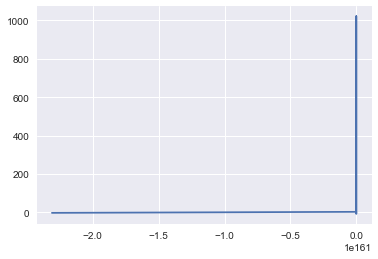

In [49]:
#ロトカ・ヴォルテラ
# dx/dt = ax-xy
# dy/dt = bxy-y

#a,b:定数
#v:変数格納のリスト(x,y)
#ndiv: 分割数
#nlevel: ノイズレベル

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import csv

def func(v, t, a, b):
    return [a*v[0]-v[0]*v[1], b*v[0]*v[1]-v[1]]

a = 68.085
b = 39.674
ndiv = 500
nlevel = 2.5
v0 = [20, 10]  #初期条件(x0,y0)
t = np.linspace(0, 50., ndiv)  #時間レンジ、間隔

sol_v = odeint(func, v0, t, args=(a, b)) + np.random.normal(0.0,nlevel,(ndiv,2))

plt.plot(t, sol_v[:,0], label="prey")
plt.plot(t, sol_v[:,1], label="predator")

plt.legend()
plt.show()

csvlist = []
csvlist = np.c_[t,sol_v]

# ファイルオープン
f = open('output.csv', 'w')
writer = csv.writer(f, lineterminator='\n')

# 出力
writer.writerows(csvlist)

# ファイルクローズ
f.close()

plt.plot(csvlist[:,1], csvlist[:,2], label="foo")
plt.show()

In [ ]:
#ランダムな初期値(a,b,x0,y0)で微分方程式を解いた解のデータとの距離を計算
#numpy.loadtxtを利用してcsvファイル読み込み

#Lotka-Volterraモデル
# dx/dt = ax-xy
# dy/dt = bxy-y

#a, b: 定数 (ランダム値)
#v0: 初期値(x0, y0) (ランダム値)
#sol_v: ランダムな初期値から求めた解
#ans_v: 読み込んだデータ
#dist: データとの距離(差分の平方和)

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import csv

def func(v, t, a, b):
    return [a*v[0]-v[0]*v[1], b*v[0]*v[1]-v[1]]

def getpara(a,b,v0):
    #ランダム値を4個生成(生成されたランダム値の範囲は0〜1)
    #ここでは 0 <= a,b,x0,yo >= 100  とする
    np.random.seed()
    iniv = np.random.rand(4)
    a = iniv[0] * 100
    b = iniv[1] * 100
    x0 = iniv[2] * 100
    y0 = iniv[3] * 100
    v0 = [x0, y0]
    return a,b,v0

ndiv = 500 #分割数
t = np.linspace(0, 50., ndiv) #時間レンジ、間隔

#CSVファイルの読み込み
data_reader = np.loadtxt('output.csv', delimiter=',')
ans_v = data_reader[:,1:3]

counter = 0
ntry = 0
tolerance = 10000.0
param = []
v0 = []
while counter < 100:
    ntry += 1
    a,b,v0 = getpara(a,b,v0)
#    print a,b,v0
    sol_v = odeint(func, v0, t, args=(a, b))
#    plt.plot(t, sol_v[:,0], label="prey")
#    plt.plot(t, sol_v[:,1], label="predator")

#   plt.legend()
#   plt.show()
    
#ランダムな初期値から求めた解とデータとの平均距離distを計算  
    #答えと計算結果の行列の差
    diff_v = sol_v - ans_v
    #行列要素の二乗を計算してから、その平均を計算 
    dist = np.mean(np.square(diff_v))
    if dist < tolerance: 
        # 行列paramに追加
        param.append([a,b,v0[0],v0[1],dist])
        counter +=1
    
print(ntry, counter)
with open('param.csv','w') as f:
    writer = csv.writer(f)
    writer.writerows(param)

print(param)

/Users/hachino/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:20: RuntimeWarning: overflow encountered in double_scalars
/Users/hachino/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in double_scalars
/Users/hachino/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:61: RuntimeWarning: overflow encountered in square
/Users/hachino/anaconda/lib/python3.6/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
